In [28]:
##set up environment

##import libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import os

##go to folder
os.chdir('/home/atimms/ngs_data/exomes/working/cunn_exome_1120')

##use matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#pip install seaborn
import seaborn as sns
print("Setup Complete")
import numpy as np

Setup Complete


In [20]:
cov_data = pd.read_table('AK-01-111.bt_cov.chr18_15-130mb.txt')
cov_data.columns=["chr", "start", "end", "AK1a", "AK1u", "AK2u", 'AK3u']

In [31]:
cov_data.head()
cov_data.shape

(1365, 7)

In [57]:
average_exons = cov_data.groupby(np.arange(len(cov_data))//100).mean()
average_exons.head()

,chr,start,end,AK1a,AK1u,AK2u,AK3u
0,8.0,16558844.06,16559302.26,90.12,113.15,65.70,119.34
1,8.0,17658645.66,17658923.78,125.30,156.75,81.59,146.67
2,8.0,18766397.22,18766766.63,94.15,109.53,65.14,116.51
3,8.0,20513997.02,20514306.70,122.62,145.86,74.71,142.15
4,8.0,21924854.94,21925086.73,162.60,185.44,97.11,177.03


In [58]:
##garphing raw data is really hard to see
# data_to_graph = cov_data[['start','AK1a','AK1u','AK2u','AK3u' ]]
# data_to_graph = pd.melt(data_to_graph,id_vars=['start'],var_name='individual', value_name='coverage')
# data_to_graph.head()

##normalize by exome coverage
average_exons["AK1a_norm"] = average_exons['AK1a']/72.457533495
average_exons["AK1u_norm"] = average_exons['AK1u']/86.6383640005
average_exons["AK2u_norm"] = average_exons['AK2u']/58.469567601
average_exons["AK3u_norm"] = average_exons['AK3u']/117.81746709
average_exons.head()
data_to_graph = average_exons[['start','AK1a_norm','AK1u_norm','AK2u_norm','AK3u_norm' ]]
data_to_graph = pd.melt(data_to_graph,id_vars=['start'],var_name='individual', value_name='norm_coverage')
data_to_graph.head()


,start,individual,norm_coverage
0,16558844.06,AK1a_norm,1.243763
1,17658645.66,AK1a_norm,1.729289
2,18766397.22,AK1a_norm,1.299382
3,20513997.02,AK1a_norm,1.692302
4,21924854.94,AK1a_norm,2.244073


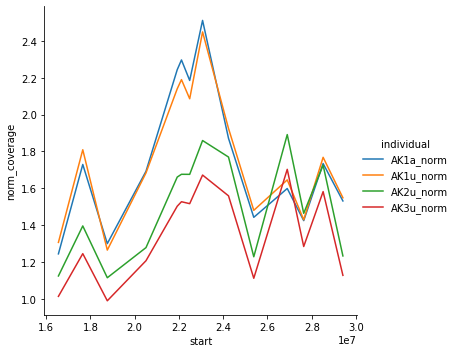

In [59]:
#data_to_graph = cov_data[]
#sns.lineplot(data=cov_data[1a, 1u])

g = sns.relplot(x="start", y="norm_coverage", hue="individual", kind="line", data=data_to_graph)
plt.savefig("AK-01-111.duplication_check.pdf")